<a href="https://colab.research.google.com/github/Ritesh-Sil/100-days-of-machine-learning/blob/main/Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data into dataframe
df_source = pd.read_csv('/content/drive/MyDrive/DataSets/train.csv')

#Copying the data into a new dataframe
df = df_source.copy()


In [3]:
#Checking sample of the data
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970
655,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Family,88000
41,42,20,RL,115.0,16905,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,170000
28,29,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,207500
396,397,20,RL,60.0,7200,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,123000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


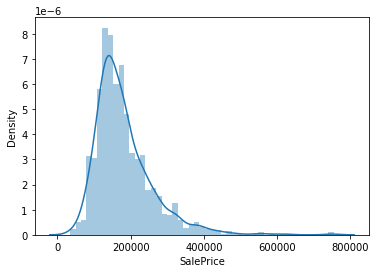

In [4]:
#Analysis on the target variable
sns.distplot(df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


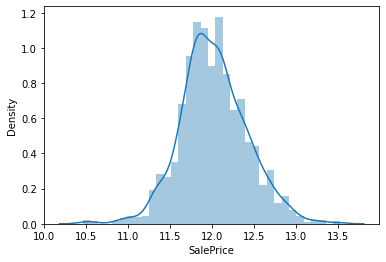

In [5]:
#Checking the sale price at log scale
log_SalePrice = np.log(df['SalePrice'])
sns.distplot(log_SalePrice)

In [6]:
#Dropping the ID column , as that will be of no use
df.drop('Id', axis = 1 , inplace =True)

In [7]:
#Handling the categorical features
cat_var = [col for col in df.columns if df[col].dtype == 'O']

#Considering MSSubClass as categorical variable
cat_var = cat_var + ['MSSubClass']

In [8]:
#Number of the categorical variables
len(cat_var)

44

In [9]:
#Cast all variables as a categorical variable
df[cat_var] = df[cat_var].astype('O')


In [10]:
#Numerical columns
num_var = [col for col in df.columns if col not in cat_var and col!='SalePrice']

#Number of numerical variables 
len(num_var)

35

In [11]:
#Variables having missing data
# We need to quantify the missing values first
var_missing_values = [col for col in df.columns if df[col].isnull().sum()>0]

#Checking the percentage of missing values for each col
df[var_missing_values].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

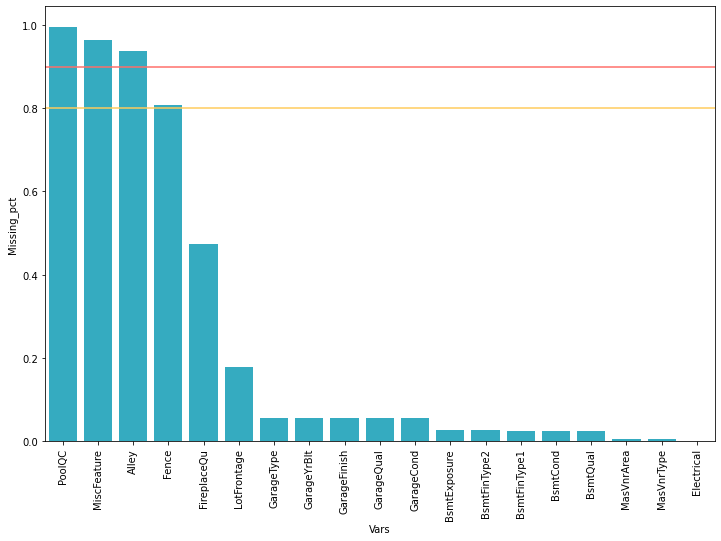

In [12]:
#Storing the missing statistics as a series into variable
missing_values = df[var_missing_values].isnull().mean().sort_values(ascending = False)

#Storing the missing stats into a dataframe
df_missing_values = pd.DataFrame(missing_values).reset_index().rename(columns = {'index':'Vars', 0:'Missing_pct'})


#Plotting the observations
fig = plt.figure(figsize=(12,8))
sns.barplot(data =df_missing_values, x='Vars', y='Missing_pct', color = '#1EBBD7')
plt.axhline(0.9, color = '#FF6F69')
plt.axhline(0.8, color = '#FFCC5C')
plt.xticks(rotation=90)

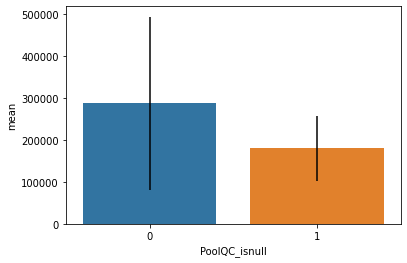

In [36]:
#Analyse the variables with missing values with the target variable
df['PoolQC'].isnull().sum()
df['PoolQC_isnull'] = np.where(df['PoolQC'].isnull(),1,0)
tmp = df.groupby('PoolQC_isnull')['SalePrice'].agg(['mean','std']).reset_index()
sns.barplot(data = tmp, x='PoolQC_isnull', y ='mean', yerr=tmp['std'])


In [69]:
#Create a function to analyse all the variables
def fn_analyse_null_values(df, var):
  df = df.copy()
  df[var] = np.where(df[var].isnull(),1,0)
  tmp = df.groupby(var)['SalePrice'].agg(['mean','std']).reset_index()
  sns.barplot(data = tmp, x=var, y ='mean', yerr=tmp['std'])
  plt.show()

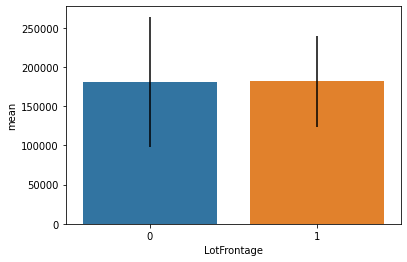

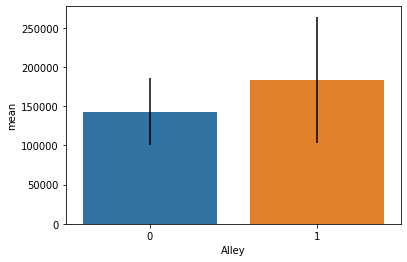

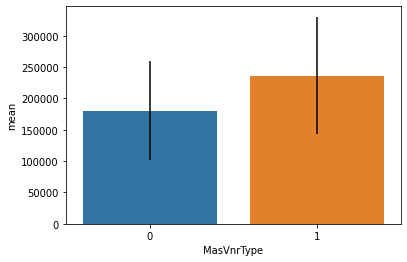

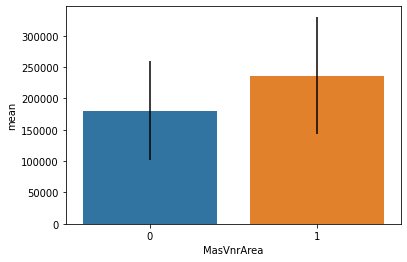

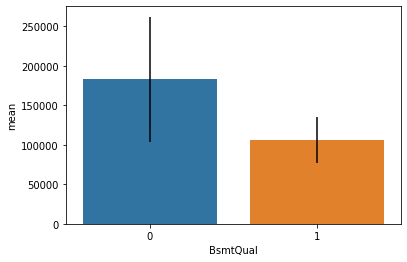

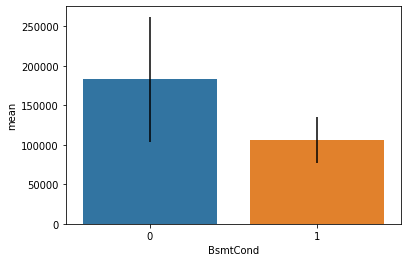

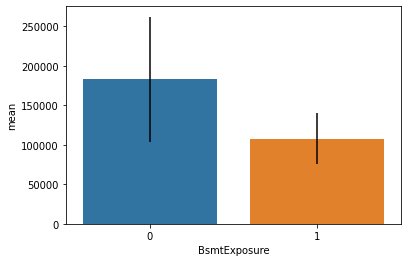

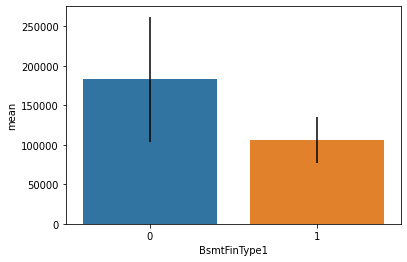

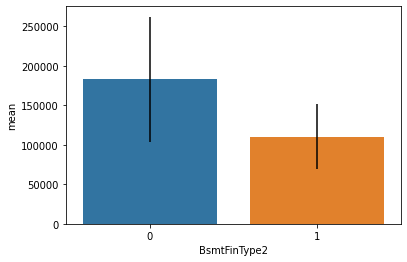

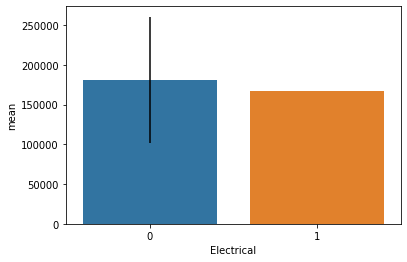

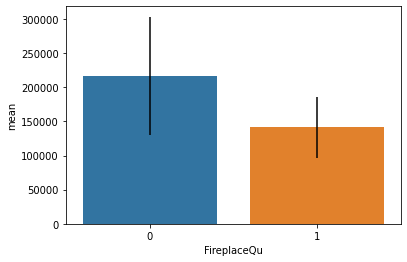

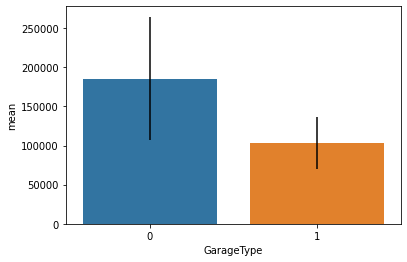

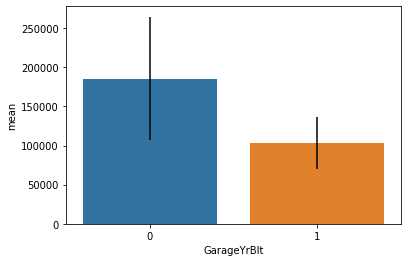

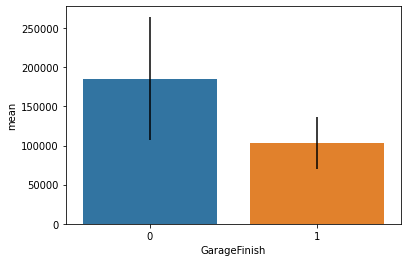

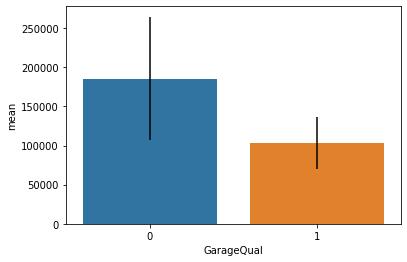

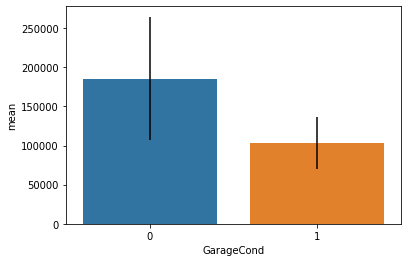

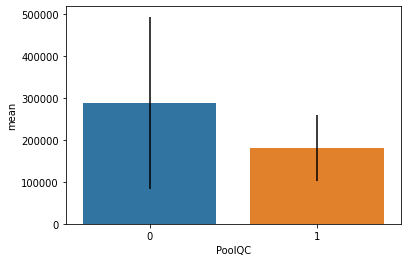

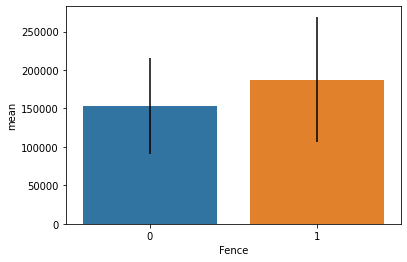

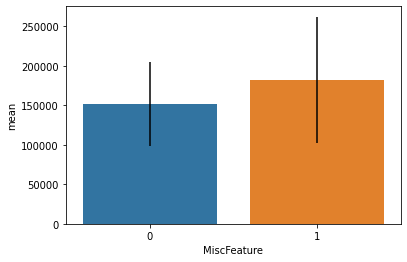

In [70]:
#
for var in var_missing_values:
  fn_analyse_null_values(df,var)